<a href="https://colab.research.google.com/github/np03cs4a240078-wq/Concepts-and-technology-of-AI/blob/main/workshop4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np


# Load dataset
data = pd.read_csv("/content/drive/MyDrive/AI/diabetes_.csv")


# Display first few rows
print(data.head())


# Dataset information
print(data.info())


# Summary statistics
print(data.describe())


# Check missing values
print(data.isnull().sum())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [3]:
# Replace 0 values with NaN for relevant medical columns
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


data[cols_with_zero] = data[cols_with_zero].replace(0, np.nan)


# Handle missing values
missing_info = data.isnull().sum() / len(data) * 100


for column in data.columns:
  if missing_info[column] > 10:
    data[column].fillna(data[column].mean(), inplace=True)
  else:
    data.dropna(subset=[column], inplace=True)


print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


/tmp/ipython-input-2123349009.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


In [18]:
# Separate features and target
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values


# Train-test split from scratch
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
  """
  Split features and target arrays into training and testing sets.


  This function randomly shuffles the dataset and splits it
  according to the specified test size ratio.


  Arguments:
  X : np.ndarray
  Feature matrix.
  y : np.ndarray
  Target vector.
  test_size : float
  Proportion of data to be used for testing.
  random_seed : int
  Seed value for reproducibility.


  Returns:
  X_train : np.ndarray
  Training feature matrix.
  X_test : np.ndarray
  Testing feature matrix.
  y_train : np.ndarray
  Training labels.
  y_test : np.ndarray
  Testing labels.
  """
  np.random.seed(random_seed)
  indices = np.arange(X.shape[0])
  np.random.shuffle(indices)


  test_split_size = int(len(X) * test_size)
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]


  X_train, X_test = X[train_indices], X[test_indices]
  y_train, y_test = y[train_indices], y[test_indices]


  return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)


print(X_train.shape, X_test.shape)

(507, 8) (217, 8)


In [17]:
def euclidean_distance(point1, point2):
  """
  Compute the Euclidean distance between two points.


  Arguments:
  point1 : np.ndarray
  First data point.
  point2 : np.ndarray
  Second data point.


  Returns:
  float
  Euclidean distance between the two points.


  Raises:
  ValueError
  If the points have different dimensions.
  """
  if point1.shape != point2.shape:
    raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")
  return np.sqrt(np.sum((point1 - point2) ** 2))

In [7]:
def knn_predict_single(query, X_train, y_train, k=3):
  distances = [euclidean_distance(query, x) for x in X_train]
  sorted_indices = np.argsort(distances)
  nearest_indices = sorted_indices[:k]
  nearest_labels = y_train[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction

In [16]:
def knn_predict(X_test, X_train, y_train, k=3):
  """
  Predict the class label for a single query point using KNN.


  Arguments:
  query : np.ndarray
  Test data point.
  X_train : np.ndarray
  Training feature matrix.
  y_train : np.ndarray
  Training labels.
  k : int
  Number of nearest neighbors.


  Returns:
  int
  Predicted class label.
  """
  predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
  return np.array(predictions)

In [19]:
def compute_accuracy(y_true, y_pred):
  """
  Calculate classification accuracy.


  Arguments:
  y_true : np.ndarray
  True class labels.
  y_pred : np.ndarray
  Predicted class labels.


  Returns:
  float
  Accuracy percentage.
  """
  correct_predictions = np.sum(y_true == y_pred)
  total_predictions = len(y_true)
  return (correct_predictions / total_predictions) * 100


predictions = knn_predict(X_test, X_train, y_train, k=3)
accuracy = compute_accuracy(y_test, predictions)


print(f"Accuracy (Original Data): {accuracy:.2f}%")

Accuracy (Original Data): 73.27%


In [10]:
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_scaled = (X - X_min) / (X_max - X_min)


X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)

In [11]:
scaled_predictions = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
scaled_accuracy = compute_accuracy(y_test_s, scaled_predictions)


print(f"Accuracy (Scaled Data): {scaled_accuracy:.2f}%")

Accuracy (Scaled Data): 74.65%


In [13]:
import time


k_values = range(1, 16)


acc_original = []
time_original = []
acc_scaled = []
time_scaled = []


for k in k_values:
  # ----- Original Data -----
  start_time = time.time()
  pred_o = knn_predict(X_test, X_train, y_train, k)
  end_time = time.time()


  acc_original.append(compute_accuracy(y_test, pred_o))
  time_original.append(end_time - start_time)


  # ----- Scaled Data -----
  start_time = time.time()
  pred_s = knn_predict(X_test_s, X_train_s, y_train_s, k)
  end_time = time.time()


  acc_scaled.append(compute_accuracy(y_test_s, pred_s))
  time_scaled.append(end_time - start_time)

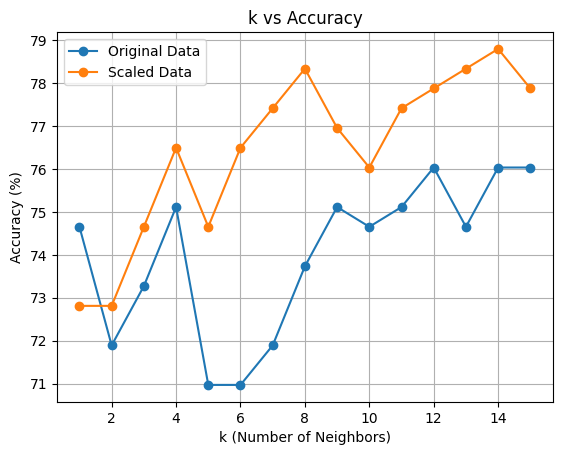

In [14]:
import matplotlib.pyplot as plt


plt.figure()
plt.plot(k_values, acc_original, marker='o', label='Original Data')
plt.plot(k_values, acc_scaled, marker='o', label='Scaled Data')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('k vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()

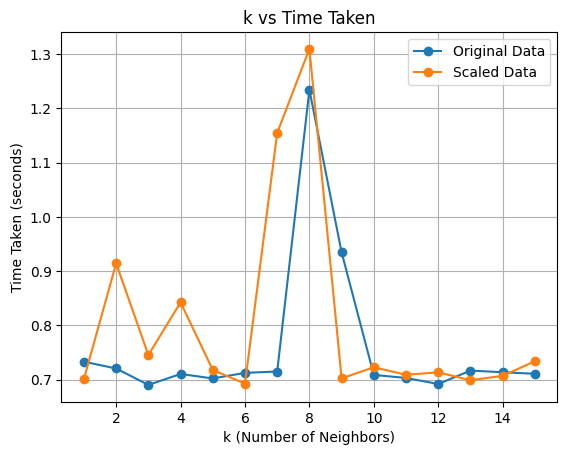

In [15]:
plt.figure()
plt.plot(k_values, time_original, marker='o', label='Original Data')
plt.plot(k_values, time_scaled, marker='o', label='Scaled Data')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time Taken (seconds)')
plt.title('k vs Time Taken')
plt.legend()
plt.grid(True)
plt.show()

#### Effect of k on Accuracy


From the experimental results, it is observed that very small values of k (such as k = 1) produce unstable accuracy. This happens because the classifier becomes highly sensitive to noise and individual data points, leading to overfitting.


As the value of k increases, the accuracy initially improves. This is because the decision boundary becomes smoother and the prediction is based on a larger neighborhood. However, after a certain point, increasing k further causes the accuracy to stagnate or slightly decrease due to underfitting, where the model becomes too generalized.


#### Effect of k on Computational Cost


The time taken to make predictions increases gradually as the value of k increases. Although KNN does not involve a training phase, it requires computing distances between the test point and all training points during prediction. A larger k requires additional operations to identify and vote among more neighbors, increasing computational cost.


#### Impact of Feature Scaling


The scaled dataset consistently shows better and more stable accuracy compared to the original dataset. This is because KNN is a distance-based algorithm, and features with larger numerical ranges dominate distance calculations if scaling is not applied. Feature scaling ensures that all attributes contribute equally to the Euclidean distance.


#### Optimal Value of k


The optimal value of k is selected based on the point where accuracy is high and stable while the prediction time remains reasonable. Based on the accuracy and time plots, a moderate value of k (typically between 5 and 9) provides the best balance between performance and computational efficiency for this dataset.


Overall, feature scaling combined with an appropriate choice of k significantly improves the performance of the KNN classifier.